In [31]:
#mengimpor library numpy (np)
import numpy as np
#mengimpor library pandas (pd)
import pandas as pd
#mengimpor library matplotlib.pyplot (plt)
import matplotlib.pyplot as plt
#mengimpor library seaborn (sns)
import seaborn as sns
#mengimpor fungsi train_test_split dari modul model_selection di library sklearn [untuk membagi data menjadi data latih dan data uji]
from sklearn.model_selection import train_test_split
#mengimpor fungsi MinMaxScaler dari modul preprocessing di library sklearn [untuk normalisasi dengan caramengubah rentan data menjadi antara 0 dan 1]
from sklearn.preprocessing import MinMaxScaler
#mengimpor fungsi Sequential dari modul models di library tensorflow.keras [untuk menumpuk lapisan secara berturut turut agar dapat membuat model jaringan saraf tiruan yang terhubung penuh]
from tensorflow.keras.models import Sequential
#mengimpor fungsi Dense dari modul mlayers di library tensorflow.keras [untuk menghubungkan setiap neuron pada lapisan ini dengan lapisan sebelumnya dan sesudahnya]
from tensorflow.keras.layers import Dense
#mengimpor fungsi LinierRegression dari modul linier_model di library sklearn [untuk menghubungkan antara variabel dependen dan independen dengan menggunakan persamaan linier]
from sklearn.linear_model import LinearRegression
#mengimpor fungsi r2_score dari modul metrics di library sklearn [untuk menghitung koefisien determinasi]
from sklearn.metrics import r2_score
#mengimpor fungsi confusion_matrix dari modul metrics di library sklearn [untuk membuat matrix]
from sklearn.metrics import confusion_matrix
#mengimpor fungsi classification_report dari modul metrics di library sklearn [untuk membuat laporan yang menunjukan berbagai metrik evaluasi untuk setiap kelas]
from sklearn.metrics import classification_report

In [7]:
#untuk membaca file CSV dan menyimpan sebagai DataFrame (memakai encoding='ISO-8859-1' karena mengandung karakter non-ASCII)
df = pd.read_csv('/car_purchasing.csv', encoding='ISO-8859-1')
#menampilkan lima baris pertama dari DataFrame
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [8]:
#menghapus kolom customer name, customer e-mail, country, gender
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True)

In [9]:
#menampilkan lima baris pertama dari DataFrame
df.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [10]:
#menampilkan ringkasan DataFrame
df.info()
#mendeteksi nilai yang hilang dan mengembalikan dengan menunjukan posisi nilai yang hilang dan menjumlahkan nilai nilai pada setiap kolom dan baris
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    float64
 1   annual Salary        500 non-null    float64
 2   credit card debt     500 non-null    float64
 3   net worth            500 non-null    float64
 4   car purchase amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

Text(0.5, 1.0, 'the corr between credit card debt and annual Salary')

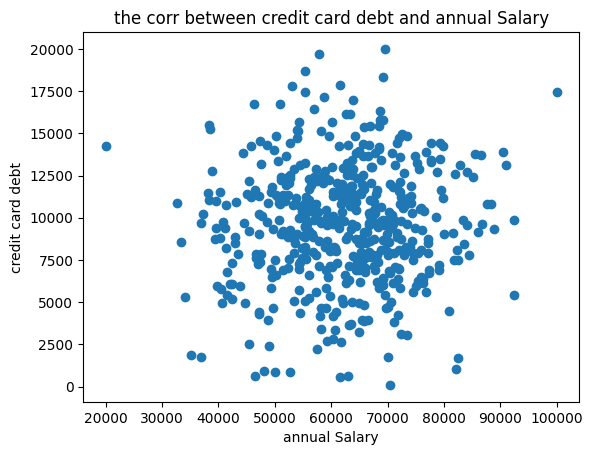

In [11]:
#membuat diagram titik yang menggambarkan hubungan antara annual salary dan credit card debt
plt.scatter(df['annual Salary'] , df['credit card debt'])
#memberikan label 'annual salary' pada sumbu x
plt.xlabel('annual Salary')
#memberikan label'credit card debt' pada sumbu y
plt.ylabel('credit card debt')
#memberikan judul 'the corr between credit card debt and annual salary' pada diagram titik
plt.title('the corr between credit card debt and annual Salary')

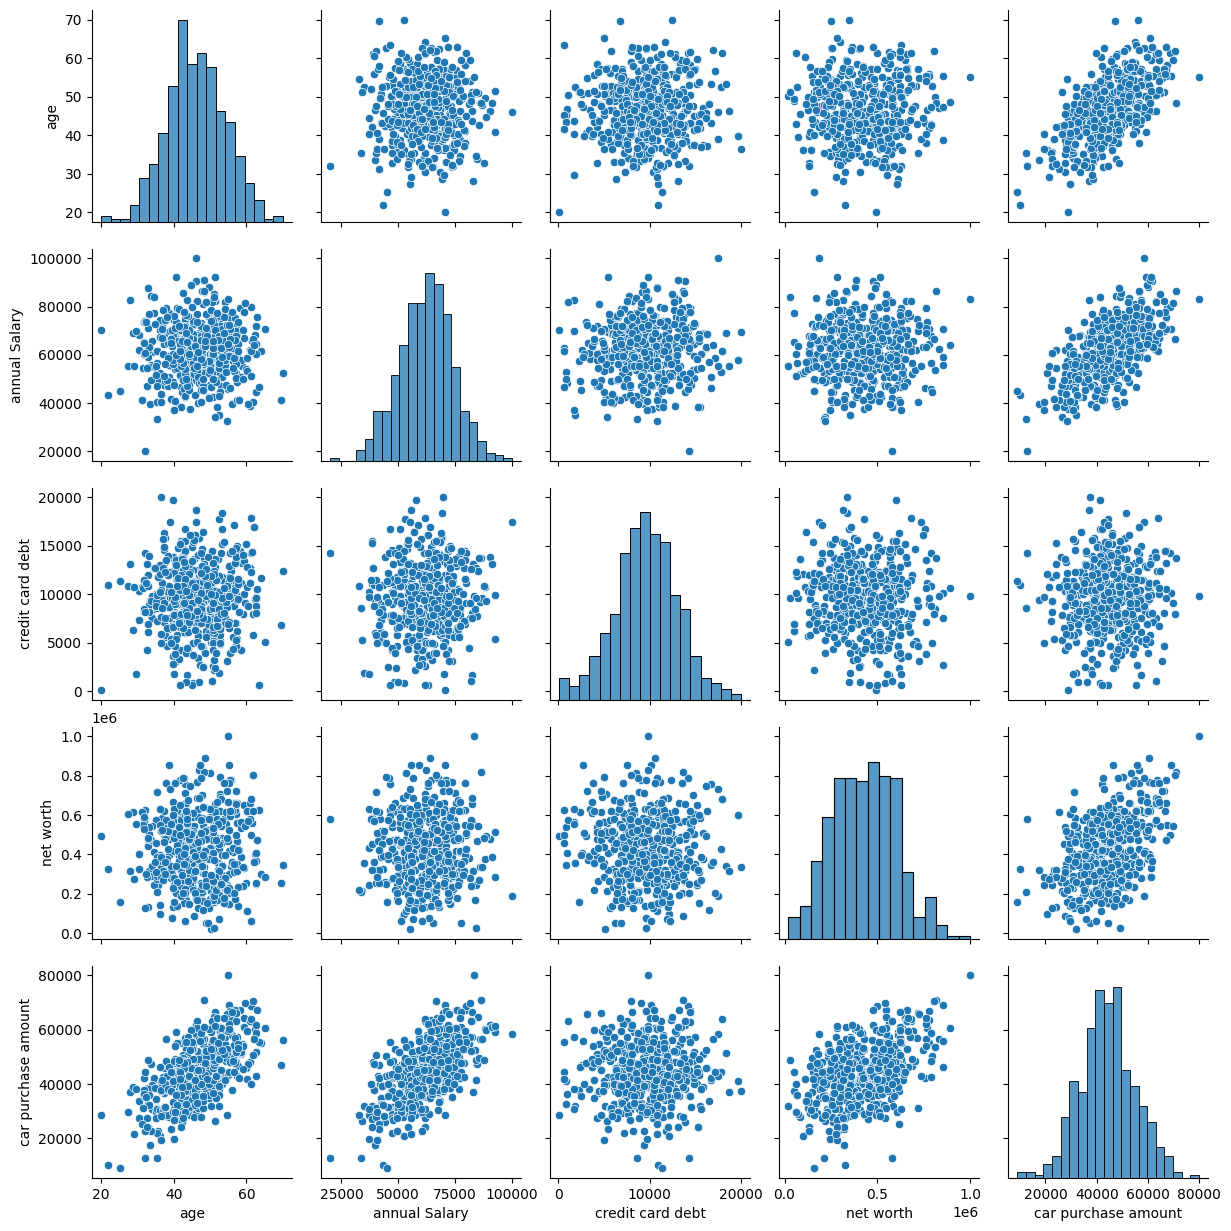

In [12]:
#membuat pairplot(plot pasangan) yang menggambarkan hubungan pada setiap variabel numerik pada DataFrame
sns.pairplot(df)

In [14]:
#mengambil semua baris(:) kecuali kolom terakhir(:-1) dan menyimpannya sebagai x
X = df.iloc[:, :-1]
#mengambil semua baris(:) kecuali kolom terakhir(:-1) dan menyimpannya sebagai y
y = df.iloc[:, -1]

In [15]:
#membuat objek MinMaxScaler dengan nama scale
scale = MinMaxScaler()
#mengubah objek scale untuk mentrasnformasi data x
X = scale.fit_transform(X)
#mengubah objek scale untuk mentrasnformasi data y
y = scale.fit_transform(y.values.reshape(-1, 1))
#mengubah data x dan data y menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [16]:
#Trying linear regression
#membuat objek LinierRegression dengan nama Ireg
lreg = LinearRegression()
#menggunakan objek lreg untuk melatih model regresi linier dengan data latih X_train dan y_train
lreg.fit(X_train, y_train)
#mencetak nilai skor pelatihan dari model regresi linier
print('Train score', lreg.score(X_train, y_train))
#mencetak nilai skor pengujian dari model regresi linier
print('Test score', lreg.score(X_test, y_test))

Train score 0.9999999815401555
Test score 0.9999999797903778


In [17]:
#menggunakan objek lreg untuk memprediksi nilai y berdasarkan data uji X_test
y_pred = lreg.predict(X_test)

In [18]:
#membuat objek Sequential dengan nama ann
ann = Sequential([Dense(32, activation="relu"),
                 Dense(1, activation='linear')])
#mengkonfigurasi objek ann untuk pelatihan.
ann.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mean_absolute_error'])

#melatih objek ann dengan data latih X_train dan y_train
history = ann.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 2s 28ms/step - loss: 0.2695 - mean_absolute_error: 0.4963 - val_loss: 0.2129 - val_mean_absolute_error: 0.4418
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 0.1710 - mean_absolute_error: 0.3890 - val_loss: 0.1260 - val_mean_absolute_error: 0.3315
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0952 - mean_absolute_error: 0.2803 - val_loss: 0.0615 - val_mean_absolute_error: 0.2172
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0431 - mean_absolute_error: 0.1795 - val_loss: 0.0254 - val_mean_absolute_error: 0.1241
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0199 - mean_absolute_error: 0.1139 - val_loss: 0.0148 - val_mean_absolute_error: 0.0962
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0964 - val_loss: 0.0142 - val_mean_absolute_error: 0.0985
Epoch 7/50
10/10 [=========

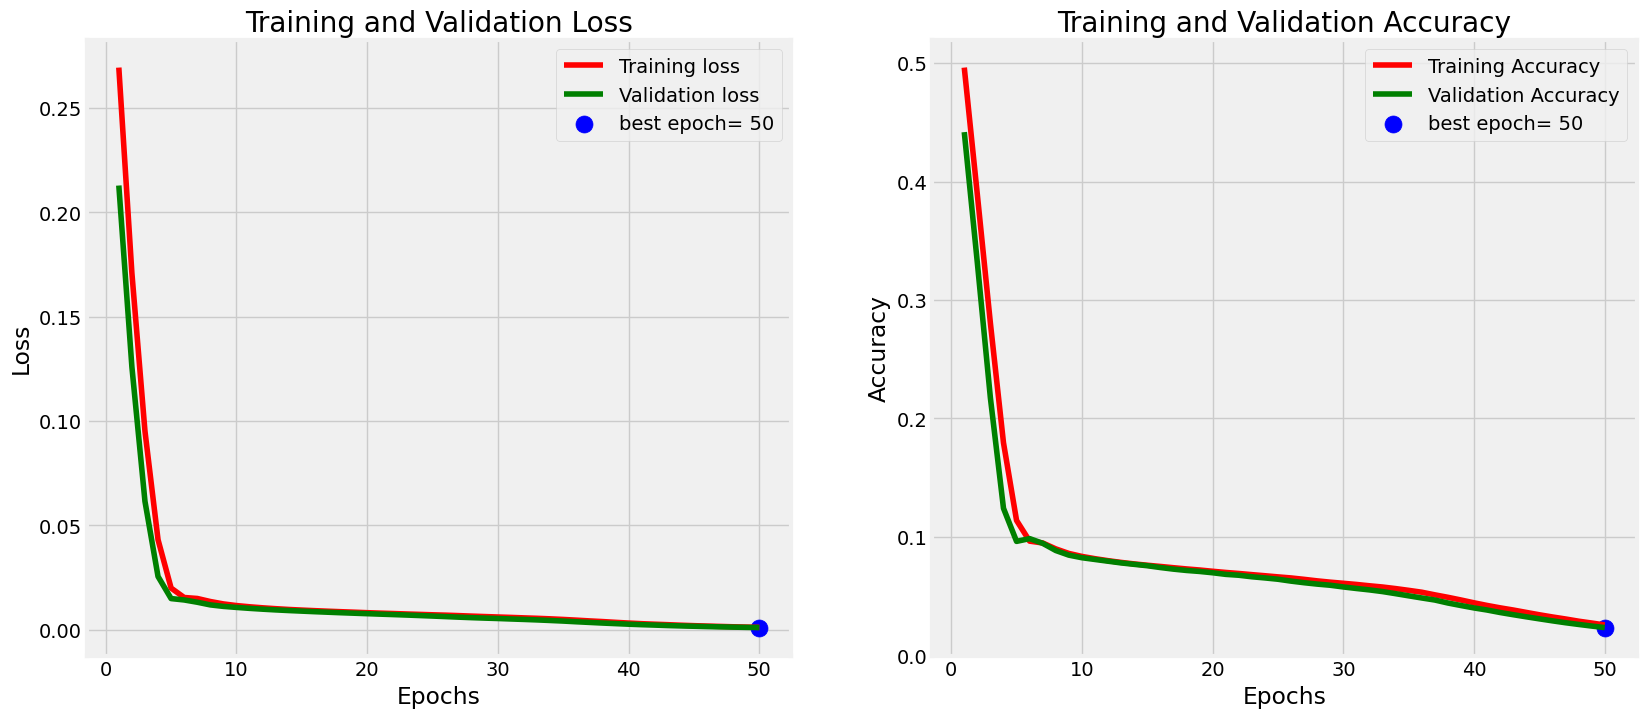

In [19]:
#menyimpan nilai 'mean_absolute_error' di dalam objek history ke dalam variabel tr_acc
tr_acc = history.history['mean_absolute_error']
#menyimpan nilai 'loss' di dalam objek history ke dalam variabel tr_loss
tr_loss = history.history['loss']
#menyimpan nilai 'val_mean_absolute_error' di dalam objek history ke dalam variabel val_acc
val_acc = history.history['val_mean_absolute_error']
#menyimpan nilai 'val_loss' di dalam objek history ke dalam variabel val_loss
val_loss = history.history['val_loss']
#mencari indeks dari nilai terkecil dalam array val_loss dengan menggunakan fungsi np.argmin() dan menyimpannya ke dalam variabel index_loss
index_loss = np.argmin(val_loss)
#mengambil nilai terkecil dalam array val_loss dengan menggunakan indeks yang sudah ditemukan sebelumnya dan menyimpannya ke dalam variabel val_lowest
val_lowest = val_loss[index_loss]
#mencari indeks dari nilai terkecil dalam array val_acc dengan menggunakan fungsi np.argmin() dan menyimpannya ke dalam variabel index_acc
index_acc = np.argmin(val_acc)
#mengambil nilai terkecil dalam array val_acc dengan menggunakan indeks yang sudah ditemukan sebelumnya dan menyimpannya ke dalam variabel acc_highest
acc_highest = val_acc[index_acc]
#membuat daftar yang berisi angka dari 1 sampai jumlah elemen dalam array tr_acc dengan menggunakan list comprehension dan menyimpannya ke dalam variabel Epochs
Epochs = [i+1 for i in range(len(tr_acc))]
#membuat string yang berisi teks ‘best epoch=’ dan nilai dari variabel index_loss ditambah satu dengan menggunakan f-string dan menyimpannya ke dalam variabel loss_label
loss_label = f'best epoch= {str(index_loss + 1)}'
#membuat string yang berisi teks ‘best epoch=’ dan nilai dari variabel index_acc ditambah satu dengan menggunakan f-string dan menyimpannya ke dalam variabel acc_label
acc_label = f'best epoch= {str(index_acc + 1)}'

#membuat objek figure dengan ukuran 20x8 inci
plt.figure(figsize= (20, 8))
#mengatur gaya plot dengan gaya'fivethirtyeight'
plt.style.use('fivethirtyeight')

#membuat subplot pertama dengan grid 1x2
plt.subplot(1, 2, 1)
#membuat plot garis merah pada variabel epochs dan tr_loss
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
#membuat plot garis hijau pada variabel epochs dan val_loss
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
#membuat plot titik biru yang menunjukan posisi epoch terbaik dan nilai loss terendah pada data validasi
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
#memberikan judul ‘Training and Validation Loss’ pada subplot pertama
plt.title('Training and Validation Loss')
#memberikan label ‘Epochs’ pada sumbu x pada subplot pertama
plt.xlabel('Epochs')
# memberikan label ‘Loss’ pada sumbu y pada subplot pertama
plt.ylabel('Loss')
#menampilkan legenda plot pada subplot pertama
plt.legend()

#membuat subplot kedua dalam grid 1x2
plt.subplot(1, 2, 2)
#membuat plot garis merah pada variabel epochs dan tr_acc
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
#membuat plot garis hijau pada variabel epochs dan val_acc
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
#membuat plot titik biru yang menunjukan posisi epoch terbaik dan nilai akurasi tertinggi pada data validasi
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
#memberikan judul ‘Training and Validation Accuracy’ pada subplot kedua
plt.title('Training and Validation Accuracy')
#memberikan label ‘Epochs’ pada sumbu x pada subplot kedua
plt.xlabel('Epochs')
#memberikan label ‘Accuracy’ pada sumbu y pada subplot kedua
plt.ylabel('Accuracy')
#menampilkan legenda plot pada subplot kedua
plt.legend()

#menyesuaikan jarak antara subplot agar tidak saling tumpang tindih
plt.tight_layout
#menampilkan figure yang sudah dibuat
plt.show()

In [20]:
#memprediksi nilai y berdasarkan data uji X_test
ann_y_pred = ann.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [21]:
#menghitung nilai R2
r2 = r2_score(y_test, y_pred)
#mencetak nilai R2
print('R2 score:', r2)

R2 score: 0.9999999797903778


In [22]:
#mengevaluasi kinerja objek ann
ann.evaluate(X_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0264


[0.0011463467963039875, 0.026372170075774193]

In [23]:
#menggunakan objek ann untuk memprediksi nilai car_purchase_amount berdasarkan data
ann.predict([[40, 70000.500, 9550,534000]])

1/1 [==============================] - 0s 72ms/step


array([[235322.64]], dtype=float32)

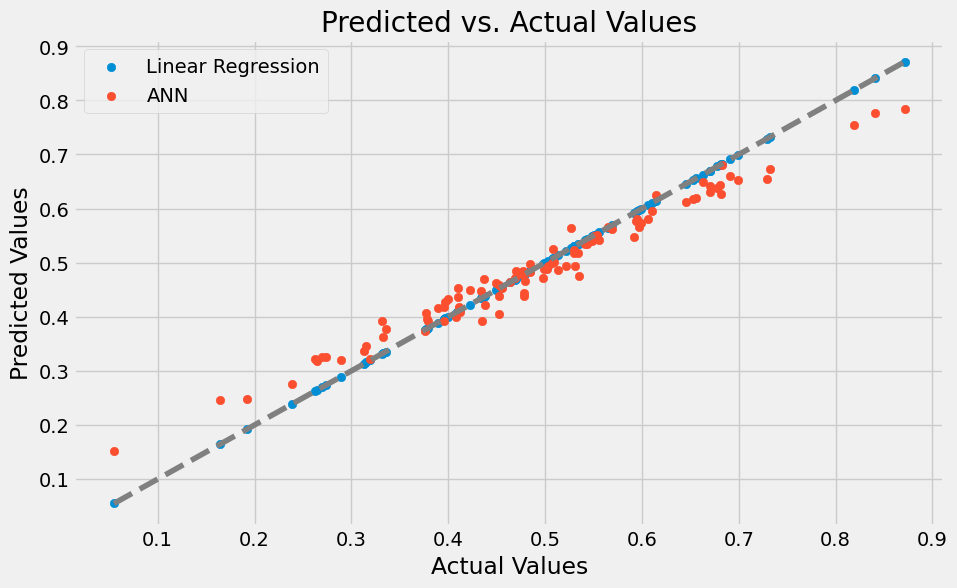

In [24]:
#membuat objek figure dengan ukuran 10 x 6 inci
plt.figure(figsize=(10, 6))
#membuat plot titik yang menggambarkan antara nilai aktual y_test dan nilai prediksi y_pred dari model regresi linier
plt.scatter(y_test, y_pred, label='Linear Regression')
#membuat plot titik yang menggambarkan antara nilai aktual y_test dan nilai prediksi y_pred dari model jaringan saraf tiruan
plt.scatter(y_test, ann_y_pred, label='ANN')
#membuat plot garis putus-putus berwarna abu-abu yang menggambarkan hubungan antara nilai minimal dan maksimal dari y_test
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
#memberikan label 'Actual Values' pada sumbu x
plt.xlabel('Actual Values')
#memberikan label 'Predicted Value' pada sumbu y
plt.ylabel('Predicted Values')
#memberikan judul ‘Predicted vs. Actual Values’ pada plot
plt.title('Predicted vs. Actual Values')
#menampilkan legenda plot
plt.legend()
#menampilkan figure yang sudah dibuat
plt.show()

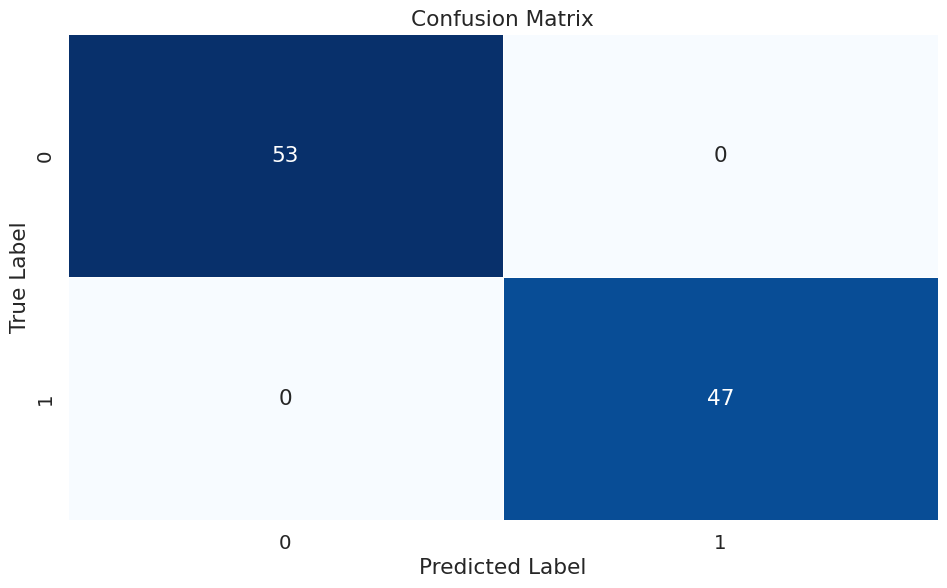

In [30]:
#Confuison Matrix

#menentukan nilai ambang batas yang digunakan untuk membuat keputusan tentang label kelas
threshold = 0.5

#mengubah array y_pred yang berisi nilai probabilitas prediksi menjadi array y_pred_class yang berisi nilai label kelas dengan menggunakan nilai ambang batas yang sudah ditentukan
y_pred_class = (y_pred > threshold).astype(int)
#menghitung dan menyimpan confusion_matrix yang menggambarkan kinerja klasifikasi
conf_matrix = confusion_matrix(y_test > threshold, y_pred > threshold)

#Menentukan ukuran tabal dengan 10x6 inci
plt.figure(figsize=(10, 6))
#Menentukan ukuran font yang digunakan untuk plot
sns.set(font_scale=1.3)
#membuat heatmap atau peta panas yang menggambarkan nilai-nilai dalam conf_matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=0.5, cbar=False, cmap='Blues')
#memberikan label ‘Predicted Label’ pada sumbu x
plt.xlabel('Predicted Label')
#memberikan label ‘True Label’ pada sumbu y
plt.ylabel('True Label')
#memberikan judul ‘Confusion Matrix’ pada plot
plt.title('Confusion Matrix')
#Menampilkan figure yang sudah dibuat
plt.show()


In [28]:
#menentukan nilai ambang batas yang digunakan untuk membuat keputusan tentang label kelas
threshold = 0.5
#mengubah array y_pred yang berisi nilai probabilitas prediksi menjadi array y_pred_class yang berisi nilai label kelas dengan menggunakan nilai ambang batas yang sudah ditentukan
y_pred_class = (y_pred > threshold).astype(int)
#menghitung dan menyimpan laporan klasifikasi utama
classification_rep = classification_report(y_test > threshold, y_pred > threshold)
#mencetak laporan klasifikasi yang sudah dihitung sebelumnya
print(classification_rep)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        53
        True       1.00      1.00      1.00        47

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

